## Arbol de decisiones clásico

### **Configuración**

In [41]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

### **¿Qué es un Árbol de Decisión?**

Un árbol de decisión es un algoritmo de aprendizaje supervisado que se utiliza tanto para tareas de clasificación como de regresión. El árbol representa una serie de decisiones, donde:

* Nodos internos: Representan las características o atributos del dataset y las condiciones para realizar una decisión.
* Ramas: Indican el resultado de cada decisión tomada.
* Hojas: Representan las clases finales (en clasificación) o valores (en regresión).

### **¿Qué es el Índice Gini?**

El índice Gini es una medida de impureza utilizada para evaluar qué tan bien una característica separa las clases en un nodo del árbol:

* Si el índice Gini es 0, significa que el nodo es puro (todas las muestras pertenecen a una sola clase).
* Si el índice Gini es 1, significa que el nodo está completamente mezclado (las muestras están distribuidas uniformemente entre las clases).
* El árbol de decisión selecciona la característica y el punto de corte que minimizan el índice Gini, con el objetivo de crear nodos lo más puros posible.

¿cómo se cálcula? 

* Gini = 1 - sumatoria de las proporciones de las clases al cuadrado

**Diferencia entre Gini y Entropía**
Ambas son métricas para medir la impureza, pero Gini es más rápido de calcular y es el criterio por defecto en scikit-learn. La entropía suele ser más informativa en datasets desbalanceados, aunque el tiempo de cómputo es mayor.

### Ejemplo usando el dataset Iris:

El dataset Iris tiene 4 características: sepal length, sepal width, petal length, y petal width. Un árbol de decisión entrenado con este dataset podría realizar las siguientes preguntas para clasificar una flor:

**¿El largo del pétalo es menor a 2.5 cm?**
Sí: Puede ser una flor de la clase Setosa.
No: Continuar evaluando con otra característica.

**¿El ancho del pétalo es menor a 1.8 cm?**
Sí: Puede ser una flor de la clase Versicolor.
No: Puede ser una flor de la clase Virginica.

#### **Visualización del árbol de decisión completo con sus criterios aprendidos en el entrenamiento**

['setosa', 'versicolor', 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


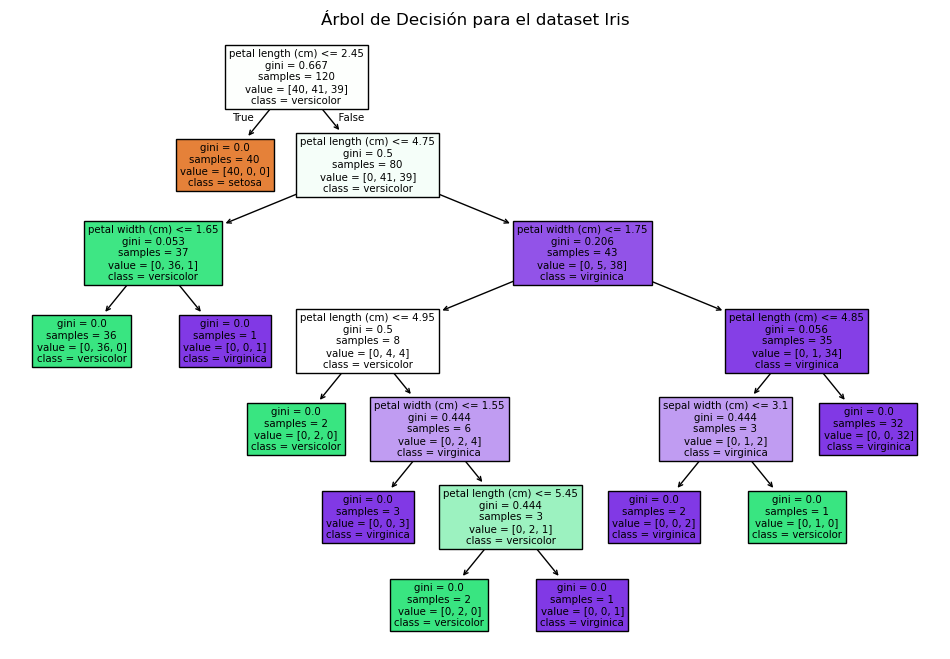

In [40]:
# Cargar el dataset Iris
iris = load_iris()
print(list(iris.target_names))
print(list(iris.feature_names)) # ['longitud del sépalo (cm)', 'ancho del sépalo (cm)', 'longitud del pétalo (cm)', 'ancho del pétalo (cm)']
X = iris.data
y = iris.target
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Visualizar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Árbol de Decisión para el dataset Iris")
plt.show()

#### **Calculo de un nodo, paso a paso**

In [ ]:
# Paso 1: calculo de las proporciones
setosa = 0
versicolor = 36
viginica = 1
total = setosa + versicolor + viginica
proporcion_setosa = setosa / total if total != 0 else 0
proporcion_versicolor = versicolor / total if total != 0 else 0
proporcion_virginica = virginica / total if total != 0 else 0
print(proporcion_setosa)
print(proporcion_versicolor)
print(proporcion_virginica)

# Paso 2: calculo del gini 
gini = 1 - (proporcion_setosa ** 2 + proporcion_versicolor ** 2 + proporcion_virginica ** 2)
print(f'el indice de gini es {gini}') 

0.0
0.972972972972973
0.02702702702702703
el indice de gini es 0.0525931336742147


#### **Ejercicio en clase:**

##### **Instrucciones**

Usando el ejemplo que se muestra a continuación escoja un nodo y haga el cálculo a mano pero para la Entropia (igual como lo hizo el profesor con el Gini)

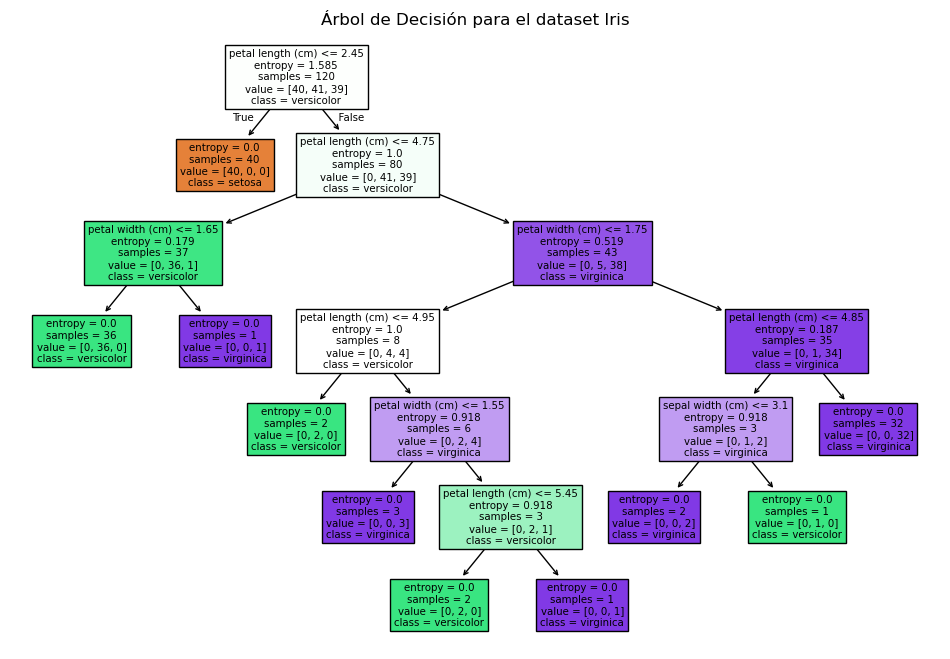

In [6]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=42,criterion='entropy')
clf.fit(X_train, y_train)

# Visualizar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Árbol de Decisión para el dataset Iris")
plt.show()

##### **Cálculo de entropía**

In [13]:
from math import log2

# Paso 1: Cálculo de las proporciones
setosa = 0
versicolor = 36
virginica = 1
total = setosa + versicolor + virginica

proporcion_setosa = setosa / total if total != 0 else 0
proporcion_versicolor = versicolor / total if total != 0 else 0
proporcion_virginica = virginica / total if total != 0 else 0

print("Proporción Setosa:", proporcion_setosa)
print("Proporción Versicolor:", proporcion_versicolor)
print("Proporción Virginica:", proporcion_virginica)

# Paso 2: Cálculo de la entropía
entropia = -1* (proporcion_versicolor * log2(proporcion_versicolor) + proporcion_virginica * log2(proporcion_virginica))
print(f"El índice de la entropía es: {entropia:.4f}")

Proporción Setosa: 0.0
Proporción Versicolor: 0.972972972972973
Proporción Virginica: 0.02702702702702703
El índice de la entropía es: 0.1793


##### **Aumentos Decrecientes en los Retornos de la Función $\log_2(x)$ y su Impacto en el Cálculo de la Entropía**

Cuando analizamos la función logarítmica $\log_2(x)$, observamos un fenómeno conocido como **rendimientos decrecientes** o **aumentos decrecientes**. Esto significa que:

- A medida que aumenta $x$, el valor de $y = \log_2(x)$ sigue creciendo, pero lo hace de manera **cada vez más lenta**.
- El **primer incremento** de $x$ produce una ganancia mayor en $y$ que los incrementos sucesivos. Es decir, el aumento de $y$ es más pronunciado para valores pequeños de $x$ y se va reduciendo conforme $x$ crece.
- En el límite, cuando $x$ se incrementa hacia el infinito, la tasa de crecimiento de $y$ tiende a **cero**.

**Impacto en el Cálculo de la Entropía**

En el contexto del cálculo de la **entropía**, esta propiedad de la función $\log_2(x)$ es fundamental:

- La **entropía** mide la incertidumbre o el desorden en un sistema, y se calcula usando la fórmula:

  $$
  \text{Entropía} = -\sum p_i \cdot \log_2(p_i)
  $$

  donde $p_i$ es la probabilidad de ocurrencia de cada clase.

- La función $\log_2(p_i)$ es mayor cuando $p_i$ es pequeño (es decir, cuando una clase es rara), y menor cuando $p_i$ es grande (cuando una clase es más común).
- Debido a los **rendimientos decrecientes** de $\log_2(x)$, el impacto de cambiar $p_i$ es mayor para probabilidades pequeñas que para probabilidades cercanas a 1.
- Esto significa que la entropía es **más sensible** a los cambios en eventos menos probables, lo que permite que el cálculo refleje con precisión el desorden introducido por clases raras.

**Ejemplo de la Vida Real**

Vamos a explicar los aumentos decrecientes con un ejemplo del día a día, relacionado con la **productividad** o el **aprendizaje**:

- Imagina que $y$ representa la **productividad** en el trabajo o el **aprendizaje** al estudiar, y $x$ son las **horas dedicadas** a estas actividades.
- Al principio, cuando comienzas a trabajar o estudiar, cada hora adicional tiene un **gran impacto**: aprendes mucho en las primeras horas o completas muchas tareas.
- Sin embargo, conforme aumentan las horas dedicadas, el **rendimiento empieza a disminuir**:
  - Después de varias horas de estudio, tu capacidad de aprender disminuye debido al cansancio.
  - En el trabajo, después de un tiempo prolongado, tu productividad empieza a caer debido a la fatiga.
- En el límite, agregar más horas no tiene prácticamente ningún beneficio adicional e incluso puede ser contraproducente.

**Conexión con la Función $\log_2(x)$**

- La función $\log_2(x)$ modela este fenómeno de manera natural, ya que refleja cómo los **retornos decrecen** a medida que $x$ (horas dedicadas) aumenta.
- Al igual que en el cálculo de la entropía, este comportamiento es clave para capturar cómo disminuyen los beneficios de aumentar el esfuerzo después de cierto punto.

**Conclusión**

Los **rendimientos decrecientes** de la función $\log_2(x)$ no solo son esenciales para el cálculo de la entropía, sino que también se aplican a muchos aspectos de la vida cotidiana. Entender esta propiedad nos ayuda a tomar decisiones informadas sobre cómo distribuir nuestros recursos (como el tiempo o el esfuerzo) para maximizar los beneficios sin caer en la trampa de los retornos decrecientes.


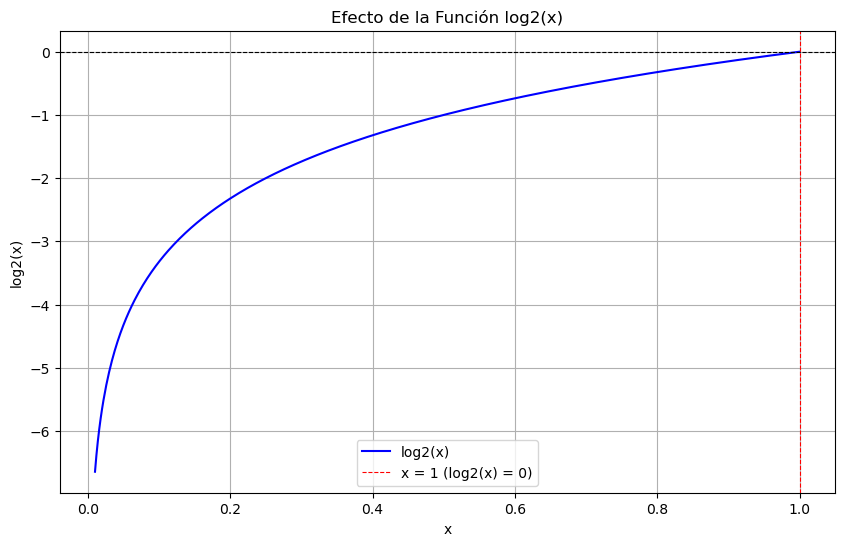

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Generar valores de x desde 0.01 hasta 10 (evitamos 0 para evitar log(0))
x = np.linspace(0.01, 1, 500)
y = np.log2(x)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="log2(x)", color='blue')

# Agregar líneas de referencia
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(1, color='red', linestyle='--', linewidth=0.8, label="x = 1 (log2(x) = 0)")

# Configurar etiquetas y título
plt.title("Efecto de la Función log2(x)")
plt.xlabel("x")
plt.ylabel("log2(x)")
plt.legend()
plt.grid()
plt.show()


### **Toma de decisión del algoritmo para el primer corte / corte inicial usando la minimización de entropía como criterio**

#### **Ejemplo que contrasta algoritmo de minimización de entropía contra scikit-learn**

##### **Explicación del algoritmo:**

* Cálculo Detallado: El código evalúa todas las posibles divisiones para cada característica y guarda los resultados en un DataFrame.
* Selección del Mejor Corte: Utiliza idxmin() para encontrar la fila con el índice Gini más bajo, que representa el mejor punto de corte inicial.
* Resultado: Muestra el mejor corte inicial encontrado, indicando la característica, el valor de corte, el índice Gini y los tamaños de los grupos resultantes.

**¿Qué Mostrará el Código?**

* La tabla completa con los cálculos detallados para cada posible punto de corte.
* El mejor corte inicial, con información sobre qué característica utilizar, el valor de corte y el índice Gini correspondiente.


**Para interpretar la tabla de resultados y determinar el primer corte (el mejor punto de división inicial) del árbol de decisión utilizando el índice Gini, sigue estos pasos:**

1. Seleccionar la Característica (Feature):
Observa la columna Feature para ver todas las características del dataset que se evaluaron (sepal length, sepal width, petal length, petal width).

2. Identificar los Posibles Puntos de Corte (Split Value):
La columna Split Value muestra los diferentes valores donde se evaluó dividir los datos para cada característica.

3. Evaluar el Índice Gini (Gini Index):
La columna Gini Index muestra el índice Gini calculado para cada punto de corte. El objetivo es encontrar el valor de índice Gini más bajo, ya que indica una mejor separación de las clases.

4. Determinar el Mejor Corte:
Filtra la tabla para cada característica y selecciona la fila con el índice Gini más bajo. Esa fila te indicará el mejor punto de corte para esa característica.

Compara los valores mínimos de índice Gini entre todas las características para determinar cuál ofrece la mejor división inicial del árbol.

In [39]:
# Cargar el dataset Iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

# Función para calcular el índice Gini
def gini_index(groups, classes):
    n_instances = float(sum([len(group) for group in groups]))
    gini = 0.0
    for group in groups:
        size = float(len(group))
        if size == 0:
            continue
        score = 0.0
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p ** 2
        gini += (1.0 - score) * (size / n_instances)
    return gini

# Crear lista para almacenar los resultados
detailed_results = []

# Iterar sobre cada característica
for feature in X.columns:
    # Ordenar los datos por la característica actual
    data = pd.concat([X[feature], y], axis=1).sort_values(by=feature).values
    classes = np.unique(y)

    # Probar cada posible punto de división
    for i in range(1, len(data)):
        left_group = data[:i]
        right_group = data[i:]
        gini = gini_index([left_group, right_group], classes)
        split_value = data[i, 0]

        # Guardar los resultados de cada iteración
        detailed_results.append({
            'Feature': feature,
            'Split Value': split_value,
            'Gini Index': gini,
            'Left Group Size': len(left_group),
            'Right Group Size': len(right_group)
        })

# Crear DataFrame con los resultados detallados
df_detailed_results = pd.DataFrame(detailed_results)

# Encontrar el mejor punto de corte inicial (índice Gini más bajo)
best_split = df_detailed_results.loc[df_detailed_results['Gini Index'].idxmin()]

# Mostrar los resultados detallados
print("Tabla de Cálculos Detallados del Índice Gini:")
print("\nEl mejor punto de corte inicial es:")
print(best_split)
df_detailed_results.head()


Tabla de Cálculos Detallados del Índice Gini:

El mejor punto de corte inicial es:
Feature             petal length (cm)
Split Value                       3.0
Gini Index                   0.333333
Left Group Size                    50
Right Group Size                  100
Name: 347, dtype: object


,Feature,Split Value,Gini Index,Left Group Size,Right Group Size
0,sepal length (cm),4.4,0.662192,1,149
1,sepal length (cm),4.4,0.657658,2,148
2,sepal length (cm),4.4,0.653061,3,147
3,sepal length (cm),4.5,0.648402,4,146
4,sepal length (cm),4.6,0.643678,5,145


##### **Uso de Scikit-learn para hacer contraste**

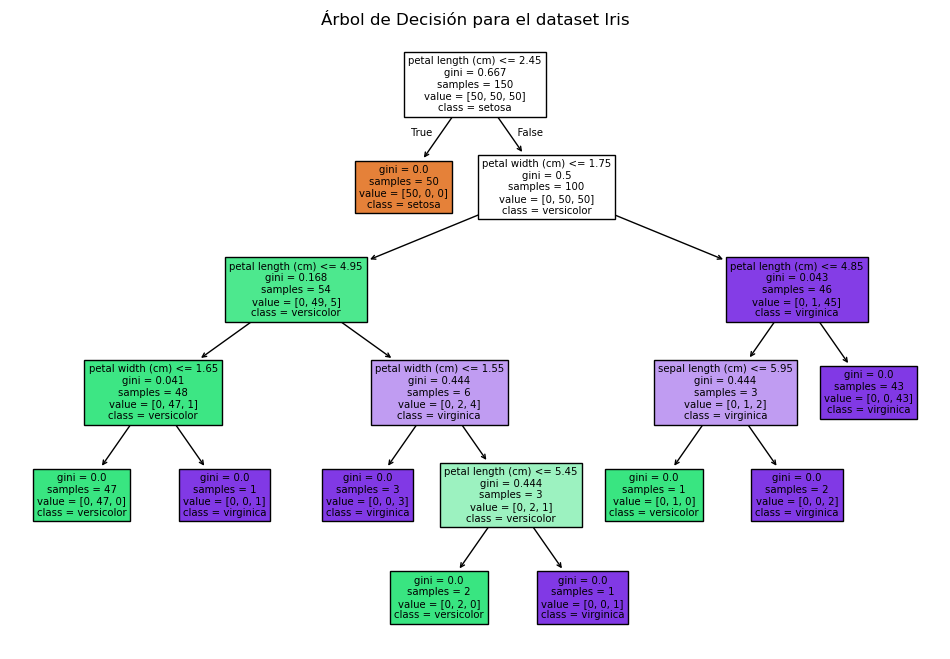

In [ ]:
# Crear y entrenar el modelo de árbol de decisión con scikit-learn para todo el dataset como lo hicimos arriba
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)
# Visualizar el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Árbol de Decisión para el dataset Iris")
plt.show()

##### **Explicación de por qué difiere el resultado con mi algoritmo**

1. Uso de idxmin(): En el código, estás utilizando la línea:
    * best_split = df_detailed_results.loc[df_detailed_results['Gini Index'].idxmin()]
    * La función idxmin() devuelve la primera ocurrencia del valor mínimo del índice Gini. En tu DataFrame, parece que la fila correspondiente a petal length aparece antes que la fila correspondiente a petal width.

2. Orden del DataFrame: El DataFrame df_detailed_results almacena los resultados de las iteraciones en el orden en que se calculan. Dado que iteras sobre las características en el orden que aparecen en el dataset (petal length antes de petal width), el primer valor mínimo encontrado corresponde a petal length.

In [32]:
# Filtrar los resultados para el gini más bajo
punto_corte = min(df_detailed_results['Gini Index'])
df_detailed_results[df_detailed_results['Gini Index']==punto_corte]

,Feature,Split Value,Gini Index,Left Group Size,Right Group Size
347,petal length (cm),3.0,0.333333,50,100
496,petal width (cm),1.0,0.333333,50,100


#### **Cálculo manual usando algoritmo CART con los mismos parámetros por default y métodos de cálculo que scikit-learn**

Para replicar mejor el comportamiento de scikit-learn, podemos:

* Implementación de algoritmo CART, que es el que usa scikit-learn
* Utilizar puntos de corte basados en el promedio de valores únicos de la característica (similar a cómo lo hace scikit-learn).
* Limitar los cortes posibles usando min_samples_split=2, que es el valor por defecto en DecisionTreeClassifier.

In [ ]:
# Función para calcular el índice Gini
def gini_index(groups, classes):
    n_instances = float(sum([len(group) for group in groups]))
    gini = 0.0
    for group in groups:
        size = float(len(group))
        if size == 0:
            continue
        score = 0.0
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p ** 2
        gini += (1.0 - score) * (size / n_instances)
    return gini

# Función para dividir el dataset basado en el valor de una característica
def test_split(index, value, dataset):
    left, right = [], []
    for row in dataset:
        if row[index] <= value:
            left.append(row)
        else:
            right.append(row)
    return left, right

# Función para encontrar la mejor división utilizando promedios de valores únicos
def get_best_split(dataset, classes):
    best_index, best_value, best_score, best_groups = 999, 999, 1, None
    for index in range(len(dataset[0]) - 1):
        unique_values = sorted(set([row[index] for row in dataset]))
        # Usar promedios de valores únicos como posibles puntos de corte
        split_points = [(unique_values[i] + unique_values[i + 1]) / 2 for i in range(len(unique_values) - 1)]
        for value in split_points:
            groups = test_split(index, value, dataset)
            gini = gini_index(groups, classes)
            if gini < best_score:
                best_index, best_value, best_score, best_groups = index, value, gini, groups
    return {'index': best_index, 'value': best_value, 'groups': best_groups}

# Preparar el dataset
dataset = pd.concat([X, y], axis=1).values
classes = np.unique(y)

# Obtener la mejor división
best_split = get_best_split(dataset, classes)

# Mostrar el resultado
print("Mejor punto de corte encontrado usando CART (ajustado):")
print(f"Característica: {iris.feature_names[best_split['index']]}")
print(f"Valor de corte: {best_split['value']:.2f}")


Mejor punto de corte encontrado usando CART (ajustado):
Característica: petal length (cm)
Valor de corte: 2.45
